In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from datetime import datetime
pd.set_option('display.max_columns', None)
from sklearn.model_selection import KFold
from collections import Counter
from sklearn.metrics import mean_squared_log_error, mean_squared_error
warnings.filterwarnings("ignore")

## Loading the training data

In [27]:
train=pd.read_csv('D:\\Data_sets\\movie\\train.csv')
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435


In [28]:
train.shape

(3000, 23)

### Additional features:- adding the some additional features which will improve our model accuracy

link for additional features:-  

https://www.kaggle.com/kerneler/starter-tmdb-competition-additional-0a390987-e/data?select=TrainAdditionalFeatures.csv
https://www.kaggle.com/kerneler/starter-tmdb-competition-additional-0a390987-e/data?select=TestAdditionalFeatures.csv

In [10]:
train_additionalfeature=pd.read_csv('D:\\Data_sets\\movie\\TrainAdditionalFeatures.csv')

### Merging the additional features to the train data on the basis of imdb_id

In [19]:
train=pd.merge(train,train_additionalfeature, how='left', on=['imdb_id'])

In [20]:
train.shape

(3000, 29)

## Loading the test data

In [12]:
test=pd.read_csv('D:\\Data_sets\\movie\\test.csv')
test.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew
0,3001,"[{'id': 34055, 'name': 'Pokémon Collection', '...",0,"[{'id': 12, 'name': 'Adventure'}, {'id': 16, '...",http://www.pokemon.com/us/movies/movie-pokemon...,tt1226251,ja,ディアルガVSパルキアVSダークライ,Ash and friends (this time accompanied by newc...,3.851534,/tnftmLMemPLduW6MRyZE0ZUD19z.jpg,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de..."
1,3002,NaN,88000,"[{'id': 27, 'name': 'Horror'}, {'id': 878, 'na...",NaN,tt0051380,en,Attack of the 50 Foot Woman,When an abused wife grows to giant size becaus...,3.559789,/9MgBNBqlH1sG4yG2u4XkwI5CoJa.jpg,"[{'name': 'Woolner Brothers Pictures Inc.', 'i...","[{'iso_3166_1': 'US', 'name': 'United States o...",5/19/58,65.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A titanic beauty spreads a macabre wave of hor...,Attack of the 50 Foot Woman,"[{'id': 9748, 'name': 'revenge'}, {'id': 9951,...","[{'cast_id': 2, 'character': 'Nancy Fowler Arc...","[{'credit_id': '55807805c3a3685b1300060b', 'de..."


In [22]:
test.shape

(4398, 22)

In [23]:
test_additionalfeature=pd.read_csv('D:\\Data_sets\\movie\\TestAdditionalFeatures.csv')

### Merging the additional features to the test data on the basis of imdb_id

In [24]:
test=pd.merge(test,test_additionalfeature, how='left', on=['imdb_id'])

In [25]:
test.shape

(4398, 25)

## Correcting the some train and test data sets 

link for this :-

https://www.kaggle.com/kamalchhirang/eda-feature-engineering-lgb-xgb-cat#Feature-Engineering-&-Prediction

In [10]:
train.loc[train['id'] == 16,'revenue'] = 192864          # Skinning
train.loc[train['id'] == 90,'budget'] = 30000000         # Sommersby          
train.loc[train['id'] == 118,'budget'] = 60000000        # Wild Hogs
train.loc[train['id'] == 149,'budget'] = 18000000        # Beethoven
train.loc[train['id'] == 313,'revenue'] = 12000000       # The Cookout 
train.loc[train['id'] == 451,'revenue'] = 12000000       # Chasing Liberty
train.loc[train['id'] == 464,'budget'] = 20000000        # Parenthood
train.loc[train['id'] == 470,'budget'] = 13000000        # The Karate Kid, Part II
train.loc[train['id'] == 513,'budget'] = 930000          # From Prada to Nada
train.loc[train['id'] == 797,'budget'] = 8000000         # Welcome to Dongmakgol
train.loc[train['id'] == 819,'budget'] = 90000000        # Alvin and the Chipmunks: The Road Chip
train.loc[train['id'] == 850,'budget'] = 90000000        # Modern Times
train.loc[train['id'] == 1007,'budget'] = 2              # Zyzzyx Road 
train.loc[train['id'] == 1112,'budget'] = 7500000        # An Officer and a Gentleman
train.loc[train['id'] == 1131,'budget'] = 4300000        # Smokey and the Bandit   
train.loc[train['id'] == 1359,'budget'] = 10000000       # Stir Crazy 
train.loc[train['id'] == 1542,'budget'] = 1              # All at Once
train.loc[train['id'] == 1570,'budget'] = 15800000       # Crocodile Dundee II
train.loc[train['id'] == 1571,'budget'] = 4000000        # Lady and the Tramp
train.loc[train['id'] == 1714,'budget'] = 46000000       # The Recruit
train.loc[train['id'] == 1721,'budget'] = 17500000       # Cocoon
train.loc[train['id'] == 1865,'revenue'] = 25000000      # Scooby-Doo 2: Monsters Unleashed
train.loc[train['id'] == 1885,'budget'] = 12             # In the Cut
train.loc[train['id'] == 2091,'budget'] = 10             # Deadfall
train.loc[train['id'] == 2268,'budget'] = 17500000       # Madea Goes to Jail budget
train.loc[train['id'] == 2491,'budget'] = 6              # Never Talk to Strangers
train.loc[train['id'] == 2602,'budget'] = 31000000       # Mr. Holland's Opus
train.loc[train['id'] == 2612,'budget'] = 15000000       # Field of Dreams
train.loc[train['id'] == 2696,'budget'] = 10000000       # Nurse 3-D
train.loc[train['id'] == 2801,'budget'] = 10000000       # Fracture
train.loc[train['id'] == 335,'budget'] = 2 
train.loc[train['id'] == 348,'budget'] = 12
train.loc[train['id'] == 470,'budget'] = 13000000 
train.loc[train['id'] == 513,'budget'] = 1100000
train.loc[train['id'] == 640,'budget'] = 6 
train.loc[train['id'] == 696,'budget'] = 1
train.loc[train['id'] == 797,'budget'] = 8000000 
train.loc[train['id'] == 850,'budget'] = 1500000
train.loc[train['id'] == 1199,'budget'] = 5 
train.loc[train['id'] == 1282,'budget'] = 9               # Death at a Funeral
train.loc[train['id'] == 1347,'budget'] = 1
train.loc[train['id'] == 1755,'budget'] = 2
train.loc[train['id'] == 1801,'budget'] = 5
train.loc[train['id'] == 1918,'budget'] = 592 
train.loc[train['id'] == 2033,'budget'] = 4
train.loc[train['id'] == 2118,'budget'] = 344 
train.loc[train['id'] == 2252,'budget'] = 130
train.loc[train['id'] == 2256,'budget'] = 1 
train.loc[train['id'] == 2696,'budget'] = 10000000

test.loc[test['id'] == 6733,'budget'] = 5000000
test.loc[test['id'] == 3889,'budget'] = 15000000
test.loc[test['id'] == 6683,'budget'] = 50000000
test.loc[test['id'] == 5704,'budget'] = 4300000
test.loc[test['id'] == 6109,'budget'] = 281756
test.loc[test['id'] == 7242,'budget'] = 10000000
test.loc[test['id'] == 7021,'budget'] = 17540562       #  Two Is a Family
test.loc[test['id'] == 5591,'budget'] = 4000000        # The Orphanage
test.loc[test['id'] == 4282,'budget'] = 20000000       # Big Top Pee-wee
test.loc[test['id'] == 3033,'budget'] = 250 
test.loc[test['id'] == 3051,'budget'] = 50
test.loc[test['id'] == 3084,'budget'] = 337
test.loc[test['id'] == 3224,'budget'] = 4  
test.loc[test['id'] == 3594,'budget'] = 25  
test.loc[test['id'] == 3619,'budget'] = 500  
test.loc[test['id'] == 3831,'budget'] = 3  
test.loc[test['id'] == 3935,'budget'] = 500  
test.loc[test['id'] == 4049,'budget'] = 995946 
test.loc[test['id'] == 4424,'budget'] = 3  
test.loc[test['id'] == 4460,'budget'] = 8  
test.loc[test['id'] == 4555,'budget'] = 1200000 
test.loc[test['id'] == 4624,'budget'] = 30 
test.loc[test['id'] == 4645,'budget'] = 500 
test.loc[test['id'] == 4709,'budget'] = 450 
test.loc[test['id'] == 4839,'budget'] = 7
test.loc[test['id'] == 3125,'budget'] = 25 
test.loc[test['id'] == 3142,'budget'] = 1
test.loc[test['id'] == 3201,'budget'] = 450
test.loc[test['id'] == 3222,'budget'] = 6
test.loc[test['id'] == 3545,'budget'] = 38
test.loc[test['id'] == 3670,'budget'] = 18
test.loc[test['id'] == 3792,'budget'] = 19
test.loc[test['id'] == 3881,'budget'] = 7
test.loc[test['id'] == 3969,'budget'] = 400
test.loc[test['id'] == 4196,'budget'] = 6
test.loc[test['id'] == 4221,'budget'] = 11
test.loc[test['id'] == 4222,'budget'] = 500
test.loc[test['id'] == 4285,'budget'] = 11
test.loc[test['id'] == 4319,'budget'] = 1
test.loc[test['id'] == 4639,'budget'] = 10
test.loc[test['id'] == 4719,'budget'] = 45
test.loc[test['id'] == 4822,'budget'] = 22
test.loc[test['id'] == 4829,'budget'] = 20
test.loc[test['id'] == 4969,'budget'] = 20
test.loc[test['id'] == 5021,'budget'] = 40 
test.loc[test['id'] == 5035,'budget'] = 1 
test.loc[test['id'] == 5063,'budget'] = 14 
test.loc[test['id'] == 5119,'budget'] = 2 
test.loc[test['id'] == 5214,'budget'] = 30 
test.loc[test['id'] == 5221,'budget'] = 50 
test.loc[test['id'] == 4903,'budget'] = 15
test.loc[test['id'] == 4983,'budget'] = 3
test.loc[test['id'] == 5102,'budget'] = 28
test.loc[test['id'] == 5217,'budget'] = 75
test.loc[test['id'] == 5224,'budget'] = 3 
test.loc[test['id'] == 5469,'budget'] = 20 
test.loc[test['id'] == 5840,'budget'] = 1 
test.loc[test['id'] == 5960,'budget'] = 30
test.loc[test['id'] == 6506,'budget'] = 11 
test.loc[test['id'] == 6553,'budget'] = 280
test.loc[test['id'] == 6561,'budget'] = 7
test.loc[test['id'] == 6582,'budget'] = 218
test.loc[test['id'] == 6638,'budget'] = 5
test.loc[test['id'] == 6749,'budget'] = 8 
test.loc[test['id'] == 6759,'budget'] = 50 
test.loc[test['id'] == 6856,'budget'] = 10
test.loc[test['id'] == 6858,'budget'] =  100
test.loc[test['id'] == 6876,'budget'] =  250
test.loc[test['id'] == 6972,'budget'] = 1
test.loc[test['id'] == 7079,'budget'] = 8000000
test.loc[test['id'] == 7150,'budget'] = 118
test.loc[test['id'] == 6506,'budget'] = 118
test.loc[test['id'] == 7225,'budget'] = 6
test.loc[test['id'] == 7231,'budget'] = 85
test.loc[test['id'] == 5222,'budget'] = 5
test.loc[test['id'] == 5322,'budget'] = 90
test.loc[test['id'] == 5350,'budget'] = 70
test.loc[test['id'] == 5378,'budget'] = 10
test.loc[test['id'] == 5545,'budget'] = 80
test.loc[test['id'] == 5810,'budget'] = 8
test.loc[test['id'] == 5926,'budget'] = 300
test.loc[test['id'] == 5927,'budget'] = 4
test.loc[test['id'] == 5986,'budget'] = 1
test.loc[test['id'] == 6053,'budget'] = 20
test.loc[test['id'] == 6104,'budget'] = 1
test.loc[test['id'] == 6130,'budget'] = 30
test.loc[test['id'] == 6301,'budget'] = 150
test.loc[test['id'] == 6276,'budget'] = 100
test.loc[test['id'] == 6473,'budget'] = 100
test.loc[test['id'] == 6842,'budget'] = 30

test.loc[test['release_date'].isnull() == True, 'release_date'] = '01/01/98'

## Null- values (train)

In [12]:
train.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
popularity2               118
rating                    118
totalVotes                118
dtype: int64

## Null- values (test)

In [29]:
test.isnull().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
popularity2               179
rating                    179
totalVotes                179
dtype: int64

## EDA and Feature Engineering

### 1. id

dropping the id column as it has no correlation with target column

In [30]:
train.drop('id', axis=1, inplace=True)

In [31]:
test.drop('id', axis=1, inplace=True)

### 2. belongs_to_collection

In [32]:
## checking for the effect on the revenue which has collectin data and which hasn't collection data

In [13]:
def get_dict(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d

In [ ]:
## for train

In [14]:
has_collection=[]

for i in train.belongs_to_collection:
    d=get_dict(i)
    if d != {}:
        has_collection.append(1)
    else:
        has_collection.append(0)

In [15]:
train['has_collection']=has_collection

<AxesSubplot:xlabel='has_collection', ylabel='revenue'>

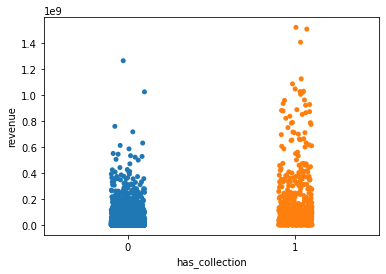

In [16]:
sns.stripplot(x=train.has_collection,y=train.revenue)

In [ ]:
## so we can see that their is some effect on the revenue w.r.t collection data, so we can use it for our model

In [ ]:
## for test

In [17]:
has_collection=[]

for i in test.belongs_to_collection:
    d=get_dict(i)
    if d != {}:
        has_collection.append(1)
    else:
        has_collection.append(0)

In [18]:
test['has_collection']=has_collection

In [19]:
# total_count_collection=[]

# for i in train.belongs_to_collection:
#     d=get_dict(i)
# #     print(d)
#     for j in d:
# #         print(j['name'])
#         total_count_collection.append(j['name'])

In [20]:
# Counter(total_count_collection).most_common(10)

In [21]:
# top_collection=[]
# for i in Counter(total_count_collection).most_common(10):
#     top_collection.append(i[0])

In [22]:
# train['all_coll'] = train['belongs_to_collection'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
#                                            if x!= {} else '')

In [23]:
# for g in top_collection:
#     train['collec_' + g] = train['all_coll'].apply(lambda x: 1 if g in x else 0)

In [24]:
train.head(2)

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.400,5.0,482.0,1
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,15.229,6.4,1528.0,1


In [25]:
# total_count_collection=[]

# for i in test.belongs_to_collection:
#     d=get_dict(i)
# #     print(d)
#     for j in d:
# #         print(j['name'])
#         total_count_collection.append(j['name'])

In [26]:
# top_collection=[]
# for i in Counter(total_count_collection).most_common(10):
#     top_collection.append(i[0])

In [27]:
# test['all_coll'] = test['belongs_to_collection'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
#                                            if x!= {} else '')

In [28]:
# for g in top_collection:
#     test['collec_' + g] = test['all_coll'].apply(lambda x: 1 if g in x else 0)

In [29]:
# idx=0

# for i in train.belongs_to_collection:
#     d=get_dict(i)
# #     print(d)
#     for j in d:
#         if j['name']=='James Bond Collection':
# #             print(j['name'])
#             print(train.revenue[idx])
            
#     idx+=1
        

In [30]:
# avg=[]
# l=[]
# for name in top_collection:
#     idx=0
#     for i in train.belongs_to_collection:
#         d=get_dict(i)
#     #     print(d)
#         for j in d:
#             if j['name']==name:
# #                 print(j['name'])
# #                 print(train.revenue[idx])
#                 l.append(train.revenue[idx])
                

#         idx+=1
#     avg.append(sum(l)/len(l))

In [31]:
# plt.figure(figsize = (15,8))
# sns.barplot(x=top_collection,y=avg)

In [32]:
train.drop(['belongs_to_collection'], axis=1, inplace=True)
test.drop(['belongs_to_collection'], axis=1, inplace=True)

## budget

## genres

In [33]:
no_of_genre=[]

for i in train.genres:
    d=get_dict(i)

    no_of_genre.append(len(d))

In [34]:
train['no_of_genre']=no_of_genre

<AxesSubplot:xlabel='no_of_genre', ylabel='revenue'>

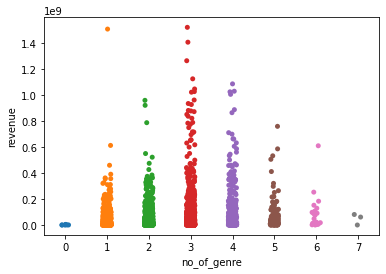

In [35]:
sns.stripplot(x=train.no_of_genre,y=train.revenue)

In [36]:
total_count_genre=[]

for i in train.genres:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_genre.append(j['name'])

In [37]:
Counter(total_count_genre).most_common(10)

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260)]

In [38]:
top_genres=[]
for i in Counter(total_count_genre).most_common():
    if i[1]>10:
        top_genres.append(i[0])

In [39]:
train['all_genres'] = train['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [40]:
for g in top_genres:
    train['genre_' + g] = train['all_genres'].apply(lambda x: 1 if g in x else 0)

In [41]:
no_of_genre=[]

for i in test.genres:
    d=get_dict(i)

    no_of_genre.append(len(d))

In [42]:
test['no_of_genre']=no_of_genre

In [43]:
total_count_genre=[]

for i in test.genres:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_genre.append(j['name'])

In [44]:
# top_genres=[]
# for i in Counter(total_count_genre).most_common():
# #     print(i[0])
#     if i[1]>10:
#         top_genres.append(i[0])

In [45]:
test['all_genres'] = test['genres'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [46]:
for g in top_genres:
    test['genre_' + g] = test['all_genres'].apply(lambda x: 1 if g in x else 0)

In [47]:
train.drop(['genres','all_genres'], axis=1, inplace=True)
test.drop(['genres','all_genres'], axis=1, inplace=True)

In [48]:
train.shape

(3000, 45)

In [49]:
test.shape

(4398, 44)

## homepage 

In [50]:
homepage_exit=[]
for i in train.homepage:
    if str(i)=='nan':
        homepage_exit.append(0)
    else:
        homepage_exit.append(1)

In [51]:
train['homepage_exit']=homepage_exit

<AxesSubplot:xlabel='homepage_exit', ylabel='revenue'>

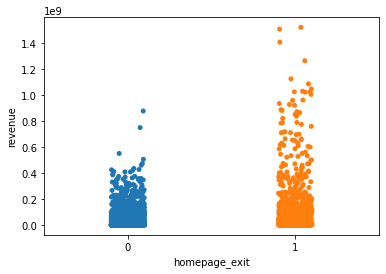

In [52]:
sns.stripplot(train.homepage_exit, train.revenue)

In [53]:
homepage_exit=[]
for i in test.homepage:
    if str(i)=='nan':
        homepage_exit.append(0)
    else:
        homepage_exit.append(1)

In [54]:
test['homepage_exit']=homepage_exit

In [55]:
train.drop('homepage', axis=1, inplace=True)
test.drop('homepage', axis=1, inplace=True)

## imdb_id

In [56]:
train.drop('imdb_id', axis=1, inplace=True)

In [57]:
test.drop('imdb_id', axis=1, inplace=True)

## original_language

In [58]:
orignal_lang_english=[]

for i in train.original_language:
    if str(i)=='en':
        orignal_lang_english.append(1)
    else:
        orignal_lang_english.append(0)

In [59]:
train['orignal_lang_english']=orignal_lang_english

<AxesSubplot:xlabel='orignal_lang_english', ylabel='revenue'>

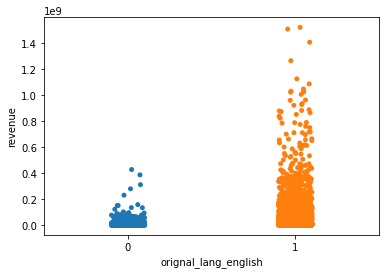

In [60]:
sns.stripplot(x=train.orignal_lang_english,y=train.revenue)

In [61]:
orignal_lang_english=[]

for i in test.original_language:
    if str(i)=='en':
        orignal_lang_english.append(1)
    else:
        orignal_lang_english.append(0)

In [62]:
test['orignal_lang_english']=orignal_lang_english

In [63]:
train.drop('original_language', axis=1, inplace=True)
test.drop('original_language', axis=1, inplace=True)

In [64]:
train.shape

(3000, 44)

In [65]:
test.shape

(4398, 43)

## original_title

In [66]:
train['original_title_letter_count'] = train.original_title.str.len()
test['original_title_letter_count'] = test.original_title.str.len()

In [67]:
train['original_title_word_count'] = train.original_title.str.split().str.len()
test['original_title_word_count'] = test.original_title.str.split().str.len()

In [68]:
train.drop('original_title', axis=1, inplace=True)
test.drop('original_title', axis=1, inplace=True)

## overview

In [69]:
train['overview_word_count'] = train.overview.str.split().str.len()
test['overview_word_count'] = test.overview.str.split().str.len()

In [70]:
train.drop('overview', axis=1, inplace=True)
test.drop('overview', axis=1, inplace=True)

## popularity

## poster_path

In [71]:
train.drop('poster_path', axis=1, inplace=True)
test.drop('poster_path', axis=1, inplace=True)

## production_companies

In [72]:
no_of_prod_comp=[]

for i in train.production_companies:
    d=get_dict(i)

    no_of_prod_comp.append(len(d))

In [73]:
train['no_of_prod_comp']=no_of_prod_comp

<AxesSubplot:xlabel='no_of_prod_comp', ylabel='revenue'>

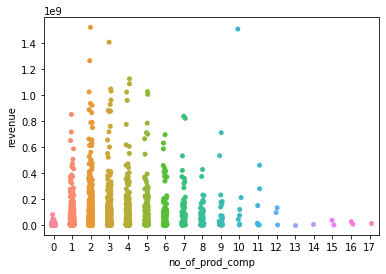

In [74]:
sns.stripplot(x=train.no_of_prod_comp,y=train.revenue)

In [75]:
total_count_prod_comp=[]

for i in train.production_companies:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_prod_comp.append(j['name'])

In [76]:
Counter(total_count_prod_comp).most_common(10)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61)]

In [77]:
top_production_comp=[]

In [78]:
for i in Counter(total_count_prod_comp).most_common():
#     print(i[0])
    if i[1]>10:
        top_production_comp.append(i[0])

In [79]:
train['all_prod_comp'] = train['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [80]:
for i in top_production_comp:
    train['prod_comp_' + i] = train['all_prod_comp'].apply(lambda x: 1 if i in x else 0)

In [81]:
no_of_prod_comp=[]

for i in test.production_companies:
    d=get_dict(i)

    no_of_prod_comp.append(len(d))

In [82]:
test['no_of_prod_comp']=no_of_prod_comp

In [83]:
total_count_prod_comp=[]

for i in test.production_companies:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_prod_comp.append(j['name'])

In [84]:
# top_production_comp=[]
# for i in Counter(total_count_prod_comp).most_common():
# #     print(i[0])
#     if i[1]>10:
#         top_production_comp.append(i[0])

In [85]:
test['all_prod_comp'] = test['production_companies'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [86]:
for i in top_production_comp:
    test['prod_comp_' + i] = test['all_prod_comp'].apply(lambda x: 1 if i in x else 0)

In [87]:
train.shape

(3000, 115)

In [88]:
test.shape

(4398, 114)

In [89]:
train.head(1)

,id,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp,all_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation,prod_comp_TriStar Pictures,prod_comp_Relativity Media,prod_comp_Canal+,prod_comp_United Artists,prod_comp_Miramax Films,prod_comp_Village Roadshow Pictures,prod_comp_Regency Enterprises,prod_comp_BBC Films,prod_comp_Dune Entertainment,prod_comp_Working Title Films,prod_comp_Fox Searchlight Pictures,prod_comp_StudioCanal,prod_comp_Lionsgate,prod_comp_DreamWorks SKG,prod_comp_Fox 2000 Pictures,prod_comp_Summit Entertainment,prod_comp_Hollywood Pictures,prod_comp_Orion Pictures,prod_comp_Amblin Entertainment,prod_comp_Dimension Films,prod_comp_Castle Rock Entertainment,prod_comp_Epsilon Motion Pictures,prod_comp_Morgan Creek Productions,prod_comp_Original Film,prod_comp_Focus Features,prod_comp_Legendary Pictures,prod_comp_Participant Media,prod_comp_Blumhouse Productions,prod_comp_New Regency Pictures,prod_comp_Film4,prod_comp_Spyglass Entertainment,prod_comp_Imagine Entertainment,prod_comp_Screen Gems,prod_comp_Millennium Films,prod_comp_TSG Entertainment,prod_comp_Lakeshore Entertainment,prod_comp_France 2 Cinéma,prod_comp_Silver Pictures,prod_comp_The Weinstein Company,prod_comp_PolyGram Filmed Entertainment,prod_comp_Eon Productions,prod_comp_Scott Rudin Productions,prod_comp_Dune Entertainment III,prod_comp_Happy Madison Productions,prod_comp_Studio Babelsberg,prod_comp_Lions Gate Films,prod_comp_EuropaCorp,prod_comp_Gaumont,prod_comp_Carolco Pictures,prod_comp_American Zoetrope,prod_comp_UK Film Council,prod_comp_TF1 Films Production,prod_comp_Ciné+,prod_comp_Revolution Studios,prod_comp_Davis Entertainment,prod_comp_Canal+ España,prod_comp_Ingenious Film Partners,prod_comp_Scott Free Productions,prod_comp_Wild Bunch
0,1,14000000,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.4,5.0,482.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22,5,29.0,3,Metro-Goldwyn-Mayer (MGM) Paramount Pictures U...,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [90]:
test.head(1)

,id,budget,popularity,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp,all_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation,prod_comp_TriStar Pictures,prod_comp_Relativity Media,prod_comp_Canal+,prod_comp_United Artists,prod_comp_Miramax Films,prod_comp_Village Roadshow Pictures,prod_comp_Regency Enterprises,prod_comp_BBC Films,prod_comp_Dune Entertainment,prod_comp_Working Title Films,prod_comp_Fox Searchlight Pictures,prod_comp_StudioCanal,prod_comp_Lionsgate,prod_comp_DreamWorks SKG,prod_comp_Fox 2000 Pictures,prod_comp_Summit Entertainment,prod_comp_Hollywood Pictures,prod_comp_Orion Pictures,prod_comp_Amblin Entertainment,prod_comp_Dimension Films,prod_comp_Castle Rock Entertainment,prod_comp_Epsilon Motion Pictures,prod_comp_Morgan Creek Productions,prod_comp_Original Film,prod_comp_Focus Features,prod_comp_Legendary Pictures,prod_comp_Participant Media,prod_comp_Blumhouse Productions,prod_comp_New Regency Pictures,prod_comp_Film4,prod_comp_Spyglass Entertainment,prod_comp_Imagine Entertainment,prod_comp_Screen Gems,prod_comp_Millennium Films,prod_comp_TSG Entertainment,prod_comp_Lakeshore Entertainment,prod_comp_France 2 Cinéma,prod_comp_Silver Pictures,prod_comp_The Weinstein Company,prod_comp_PolyGram Filmed Entertainment,prod_comp_Eon Productions,prod_comp_Scott Rudin Productions,prod_comp_Dune Entertainment III,prod_comp_Happy Madison Productions,prod_comp_Studio Babelsberg,prod_comp_Lions Gate Films,prod_comp_EuropaCorp,prod_comp_Gaumont,prod_comp_Carolco Pictures,prod_comp_American Zoetrope,prod_comp_UK Film Council,prod_comp_TF1 Films Production,prod_comp_Ciné+,prod_comp_Revolution Studios,prod_comp_Davis Entertainment,prod_comp_Canal+ España,prod_comp_Ingenious Film Partners,prod_comp_Scott Free Productions,prod_comp_Wild Bunch
0,3001,0,3.851534,NaN,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",7/14/07,90.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Somewhere Between Time & Space... A Legend Is ...,Pokémon: The Rise of Darkrai,"[{'id': 11451, 'name': 'pok√©mon'}, {'id': 115...","[{'cast_id': 3, 'character': 'Tonio', 'credit_...","[{'credit_id': '52fe44e7c3a368484e03d683', 'de...",6.468,6.6,91.0,1,4,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,18,1,57.0,0,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [91]:
train.drop(['production_companies','all_prod_comp'], axis=1, inplace=True)
test.drop(['production_companies','all_prod_comp'], axis=1, inplace=True)

In [92]:
train.shape

(3000, 113)

In [93]:
test.shape

(4398, 112)

## production_countries

In [94]:
no_prod_countries=[]

for i in train.production_countries:
    d=get_dict(i)

    no_prod_countries.append(len(d))

In [95]:
train['no_prod_countries']=no_prod_countries

In [96]:
no_prod_countries=[]

for i in test.production_countries:
    d=get_dict(i)

    no_prod_countries.append(len(d))

In [97]:
test['no_prod_countries']=no_prod_countries

In [98]:
production_country_usa=[]

for i in train.production_countries:
    d=get_dict(i)
    if d!={}:
        if 'United States of America' in (d[0]['name']):
            production_country_usa.append(1)
        else:
            production_country_usa.append(0)
    else:
        production_country_usa.append(0)

In [99]:
train['production_country_usa']=production_country_usa

In [100]:
production_country_usa=[]

for i in test.production_countries:
    d=get_dict(i)
    if d!={}:
        if 'United States of America' in (d[0]['name']):
            production_country_usa.append(1)
        else:
            production_country_usa.append(0)
    else:
        production_country_usa.append(0)

In [101]:
test['production_country_usa']=production_country_usa

In [102]:
total_count_prod_country=[]

for i in train.production_countries:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_prod_country.append(j['iso_3166_1'])

In [103]:
Counter(total_count_prod_country).most_common(10)

[('US', 2282),
 ('GB', 380),
 ('FR', 222),
 ('DE', 167),
 ('CA', 120),
 ('IN', 81),
 ('IT', 64),
 ('JP', 61),
 ('AU', 61),
 ('RU', 58)]

In [104]:
top_production_country=[]
for i in Counter(total_count_prod_country).most_common():
#     print(i[0])
    if i[1]>10:
        top_production_country.append(i[0])

In [105]:
train['all_prod_country'] = train['production_countries'].apply(lambda x: ' '.join(sorted([i['iso_3166_1'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [106]:
for i in top_production_country:
    train['prod_country_' + i] = train['all_prod_country'].apply(lambda x: 1 if i in x else 0)

In [107]:
total_count_prod_country=[]

for i in test.production_countries:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_prod_country.append(j['iso_3166_1'])

In [108]:
Counter(total_count_prod_country).most_common(10)

[('US', 3335),
 ('GB', 537),
 ('FR', 348),
 ('DE', 244),
 ('CA', 203),
 ('IN', 139),
 ('JP', 96),
 ('IT', 96),
 ('AU', 87),
 ('ES', 85)]

In [109]:
# top_production_country=[]
# for i in Counter(total_count_prod_country).most_common():
# #     print(i[0])
#     if i[1]>10:
#         top_production_country.append(i[0])

In [110]:
test['all_prod_country'] = test['production_countries'].apply(lambda x: ' '.join(sorted([i['iso_3166_1'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [111]:
for i in top_production_country:
    test['prod_country_' + i] = test['all_prod_country'].apply(lambda x: 1 if i in x else 0)

In [112]:
train.shape

(3000, 139)

In [113]:
test.shape

(4398, 138)

In [114]:
train.drop(['production_countries','all_prod_country'], axis=1, inplace=True)
test.drop(['production_countries','all_prod_country'], axis=1, inplace=True)

In [115]:
train.shape

(3000, 137)

In [116]:
test.shape

(4398, 136)

## release_date

In [117]:
def date(x):
    x=str(x)
    year=x.split('/')[2]
    if int(year)<19:
        return x[:-2]+'20'+year
    else:
        return x[:-2]+'19'+year
    
train['release_date'] =train['release_date'].fillna('1/1/90').apply(lambda x: date(x))
test['release_date']  =test['release_date'].fillna('1/1/90').apply(lambda x: date(x))

#from datetime import datetime
train['release_date'] = train['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))
test['release_date']  = test['release_date'].apply(lambda x: datetime.strptime(x,'%m/%d/%Y'))

train['release_day']   = train['release_date'].apply(lambda x:x.weekday())
train['release_month'] = train['release_date'].apply(lambda x:x.month)
train['release_year']  = train['release_date'].apply(lambda x:x.year)

test['release_day']   = test['release_date'].apply(lambda x:x.weekday())
test['release_month'] = test['release_date'].apply(lambda x:x.month)
test['release_year']  = test['release_date'].apply(lambda x:x.year)



In [118]:
train.drop('release_date', axis=1, inplace=True)
test.drop('release_date', axis=1, inplace=True)

## runtime

In [119]:
train.runtime=train.runtime.fillna(train.runtime.mean())

In [120]:
test.runtime=test.runtime.fillna(test.runtime.mean())

## spoken_languages

In [121]:
no_lang_spoken=[]

for i in train.spoken_languages:
    d=get_dict(i)

    no_lang_spoken.append(len(d))

In [122]:
train['no_lang_spoken']=no_lang_spoken

In [123]:
no_lang_spoken=[]

for i in test.spoken_languages:
    d=get_dict(i)

    no_lang_spoken.append(len(d))

In [124]:
test['no_lang_spoken']=no_lang_spoken

In [125]:
total_count_spoken_lang=[]

for i in train.spoken_languages:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_spoken_lang.append(j['iso_639_1'])

In [126]:
# Counter(total_count_spoken_lang).most_common()

In [127]:
top_spoken_lang=[]
for i in Counter(total_count_spoken_lang).most_common():
    if i[1]>10:
#         print(i[0])
        top_spoken_lang.append(i[0])

In [128]:
train['spoken_lang'] = train['spoken_languages'].apply(lambda x: ' '.join(sorted([i['iso_639_1'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [129]:
for i in top_spoken_lang:
    train['spoken_lang_' + i] = train['spoken_lang'].apply(lambda x: 1 if i in x else 0)

In [130]:
train.head(1)

,id,budget,popularity,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation,prod_comp_TriStar Pictures,prod_comp_Relativity Media,prod_comp_Canal+,prod_comp_United Artists,prod_comp_Miramax Films,prod_comp_Village Roadshow Pictures,prod_comp_Regency Enterprises,prod_comp_BBC Films,prod_comp_Dune Entertainment,prod_comp_Working Title Films,prod_comp_Fox Searchlight Pictures,prod_comp_StudioCanal,prod_comp_Lionsgate,prod_comp_DreamWorks SKG,prod_comp_Fox 2000 Pictures,prod_comp_Summit Entertainment,prod_comp_Hollywood Pictures,prod_comp_Orion Pictures,prod_comp_Amblin Entertainment,prod_comp_Dimension Films,prod_comp_Castle Rock Entertainment,prod_comp_Epsilon Motion Pictures,prod_comp_Morgan Creek Productions,prod_comp_Original Film,prod_comp_Focus Features,prod_comp_Legendary Pictures,prod_comp_Participant Media,prod_comp_Blumhouse Productions,prod_comp_New Regency Pictures,prod_comp_Film4,prod_comp_Spyglass Entertainment,prod_comp_Imagine Entertainment,prod_comp_Screen Gems,prod_comp_Millennium Films,prod_comp_TSG Entertainment,prod_comp_Lakeshore Entertainment,prod_comp_France 2 Cinéma,prod_comp_Silver Pictures,prod_comp_The Weinstein Company,prod_comp_PolyGram Filmed Entertainment,prod_comp_Eon Productions,prod_comp_Scott Rudin Productions,prod_comp_Dune Entertainment III,prod_comp_Happy Madison Productions,prod_comp_Studio Babelsberg,prod_comp_Lions Gate Films,prod_comp_EuropaCorp,prod_comp_Gaumont,prod_comp_Carolco Pictures,prod_comp_American Zoetrope,prod_comp_UK Film Council,prod_comp_TF1 Films Production,prod_comp_Ciné+,prod_comp_Revolution Studios,prod_comp_Davis Entertainment,prod_comp_Canal+ España,prod_comp_Ingenious Film Partners,prod_comp_Scott Free Productions,prod_comp_Wild Bunch,no_prod_countries,production_country_usa,prod_country_US,prod_country_GB,prod_country_FR,prod_country_DE,prod_country_CA,prod_country_IN,prod_country_IT,prod_country_JP,prod_country_AU,prod_country_RU,prod_country_ES,prod_country_CN,prod_country_HK,prod_country_IE,prod_country_BE,prod_country_KR,prod_country_MX,prod_country_SE,prod_country_NZ,prod_country_NL,prod_country_CZ,prod_country_DK,prod_country_BR,release_day,release_month,release_year,no_lang_spoken,spoken_lang,spoken_lang_en,spoken_lang_fr,spoken_lang_es,spoken_lang_de,spoken_lang_ru,spoken_lang_it,spoken_lang_ja,spoken_lang_zh,spoken_lang_hi,spoken_lang_pt,spoken_lang_ar,spoken_lang_ko,spoken_lang_cn,spoken_lang_ta,spoken_lang_pl,spoken_lang_hu,spoken_lang_la,spoken_lang_sv,spoken_lang_th,spoken_lang_cs,spoken_lang_he,spoken_lang_el,spoken_lang_tr,spoken_lang_da
0,1,14000000,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,10.4,5.0,482.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,22,5,29.0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,2,2015,1,en,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [131]:
total_count_spoken_lang=[]

for i in test.spoken_languages:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_spoken_lang.append(j['iso_639_1'])

In [132]:
# top_spoken_lang=[]
# for i in Counter(total_count_spoken_lang).most_common():
#     if i[1]>10:
# #         print(i[0])
#         top_spoken_lang.append(i[0])

In [133]:
test['spoken_lang'] = test['spoken_languages'].apply(lambda x: ' '.join(sorted([i['iso_639_1'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [134]:
for i in top_spoken_lang:
    test['spoken_lang_' + i] = test['spoken_lang'].apply(lambda x: 1 if i in x else 0)

In [135]:
train.drop(['spoken_languages','spoken_lang'], axis=1, inplace=True)
test.drop(['spoken_languages','spoken_lang'], axis=1, inplace=True)

In [136]:
train.shape

(3000, 163)

In [137]:
test.shape

(4398, 162)

## status

In [138]:
train['is_released']=1

In [139]:
test['is_released']=1

In [140]:
train.loc[ train['status']!= 'Released','is_released' ]=0

In [141]:
test.loc[ test['status']!= 'Released','is_released' ]=0

In [142]:
train.drop('status', axis=1, inplace=True)
test.drop('status', axis=1, inplace=True)

## tagline

In [143]:
has_tagline=[]
for i in train.tagline:
#     print(i)
    if str(i)=='nan':
        has_tagline.append(0)
    else:
        has_tagline.append(1)

In [144]:
train['has_tagline']=has_tagline

<AxesSubplot:xlabel='has_tagline', ylabel='revenue'>

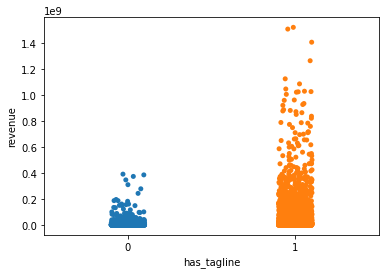

In [145]:
sns.stripplot(train.has_tagline, train.revenue)

In [146]:
has_tagline=[]
for i in test.tagline:
#     print(i)
    if str(i)=='nan':
        has_tagline.append(0)
    else:
        has_tagline.append(1)

In [147]:
test['has_tagline']=has_tagline

In [148]:
train.drop('tagline', axis=1, inplace=True)
test.drop('tagline', axis=1, inplace=True)

## title

In [149]:

train['title_word_count'] = train.title.str.split().str.len()
test['title_word_count'] = test.title.str.split().str.len()

In [150]:
train.drop('title', axis=1, inplace=True)
test.drop('title', axis=1, inplace=True)

## Keywords

In [151]:
has_keyword=[]
for i in train.Keywords:
#     print(i)
    if str(i)=='nan':
        has_keyword.append(0)
    else:
        has_keyword.append(1)

In [152]:
train['has_keyword']=has_keyword

<AxesSubplot:xlabel='has_keyword', ylabel='revenue'>

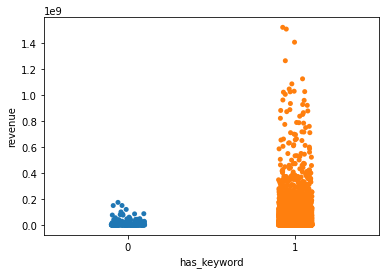

In [153]:
sns.stripplot(train.has_keyword, train.revenue)

In [154]:
has_keyword=[]
for i in test.Keywords:
#     print(i)
    if str(i)=='nan':
        has_keyword.append(0)
    else:
        has_keyword.append(1)

In [155]:
test['has_keyword']=has_keyword

In [156]:
no_of_keyword=[]

for i in train.Keywords:
    d=get_dict(i)

    no_of_keyword.append(len(d))

In [157]:
train['no_of_keyword']=no_of_keyword

In [158]:
no_of_keyword=[]

for i in test.Keywords:
    d=get_dict(i)

    no_of_keyword.append(len(d))

In [159]:
test['no_of_keyword']=no_of_keyword

In [160]:
total_count_keyword=[]

for i in train.Keywords:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_keyword.append(j['name'])

In [161]:
Counter(total_count_keyword).most_common(10)

[('woman director', 175),
 ('independent film', 155),
 ('duringcreditsstinger', 134),
 ('murder', 123),
 ('based on novel', 111),
 ('violence', 87),
 ('sport', 82),
 ('biography', 77),
 ('aftercreditsstinger', 75),
 ('dystopia', 73)]

In [162]:
top_keywords=[]
for i in Counter(total_count_keyword).most_common():
    if i[1]>10:
#         print(i[0])
        top_keywords.append(i[0])

In [163]:
train['all_keyword'] = train['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [164]:
for i in top_keywords:
    train['keyword_' + i] = train['all_keyword'].apply(lambda x: 1 if i in x else 0)

In [165]:
train.head(1)

,id,budget,popularity,runtime,Keywords,cast,crew,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation,prod_comp_TriStar Pictures,prod_comp_Relativity Media,prod_comp_Canal+,prod_comp_United Artists,prod_comp_Miramax Films,prod_comp_Village Roadshow Pictures,prod_comp_Regency Enterprises,prod_comp_BBC Films,prod_comp_Dune Entertainment,prod_comp_Working Title Films,prod_comp_Fox Searchlight Pictures,prod_comp_StudioCanal,prod_comp_Lionsgate,prod_comp_DreamWorks SKG,prod_comp_Fox 2000 Pictures,prod_comp_Summit Entertainment,prod_comp_Hollywood Pictures,prod_comp_Orion Pictures,prod_comp_Amblin Entertainment,prod_comp_Dimension Films,prod_comp_Castle Rock Entertainment,prod_comp_Epsilon Motion Pictures,prod_comp_Morgan Creek Productions,prod_comp_Original Film,prod_comp_Focus Features,prod_comp_Legendary Pictures,prod_comp_Participant Media,prod_comp_Blumhouse Productions,prod_comp_New Regency Pictures,prod_comp_Film4,prod_comp_Spyglass Entertainment,prod_comp_Imagine Entertainment,prod_comp_Screen Gems,prod_comp_Millennium Films,prod_comp_TSG Entertainment,prod_comp_Lakeshore Entertainment,prod_comp_France 2 Cinéma,prod_comp_Silver Pictures,prod_comp_The Weinstein Company,prod_comp_PolyGram Filmed Entertainment,prod_comp_Eon Productions,prod_comp_Scott Rudin Productions,prod_comp_Dune Entertainment III,prod_comp_Happy Madison Productions,prod_comp_Studio Babelsberg,prod_comp_Lions Gate Films,prod_comp_EuropaCorp,prod_comp_Gaumont,prod_comp_Carolco Pictures,prod_comp_American Zoetrope,prod_comp_UK Film Council,prod_comp_TF1 Films Production,prod_comp_Ciné+,prod_comp_Revolution Studios,prod_comp_Davis Entertainment,prod_comp_Canal+ España,prod_comp_Ingenious Film Partners,prod_comp_Scott Free Productions,prod_comp_Wild Bunch,no_prod_countries,production_country_usa,prod_country_US,prod_country_GB,prod_country_FR,prod_country_DE,prod_country_CA,prod_country_IN,prod_country_IT,prod_country_JP,prod_country_AU,prod_country_RU,prod_country_ES,prod_country_CN,prod_country_HK,prod_country_IE,prod_country_BE,prod_country_KR,prod_country_MX,prod_country_SE,prod_country_NZ,prod_country_NL,prod_country_CZ,prod_country_DK,prod_country_BR,release_day,release_month,release_year,no_lang_spoken,spoken_lang_en,spoken_lang_fr,spoken_lang_es,spoken_lang_de,spoken_lang_ru,spoken_lang_it,spoken_lang_ja,spoken_lang_zh,spoken_lang_hi,spoken_lang_pt,spoken_lang_ar,spoken_lang_ko,spoken_lang_cn,spoken_lang_ta,spoken_lang_pl,spoken_lang_hu,spoken_lang_la,spoken_lang_sv,spoken_lang_th,spoken_lang_cs,spoken_lang_he,spoken_lang_el,spoken_lang_tr,spoken_lang_da,is_released,has_tagline,title_word_count,has_keyword,no_of_keyword,all_keyword,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,keyword_wedding,keyword_3d,keyword_detective,keyword_london e

In [166]:
total_count_keyword=[]

for i in test.Keywords:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_keyword.append(j['name'])

In [167]:
# top_keywords=[]
# for i in Counter(total_count_keyword).most_common():
#     if i[1]>10:
# #         print(i[0])
#         top_keywords.append(i[0])

In [168]:
test['all_keyword'] = test['Keywords'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [169]:
for i in top_keywords:
    test['keyword_' + i] = test['all_keyword'].apply(lambda x: 1 if i in x else 0)

In [170]:
train.drop(['Keywords','all_keyword'], axis=1, inplace=True)
test.drop(['Keywords','all_keyword'], axis=1, inplace=True)

In [171]:
train.shape

(3000, 472)

In [172]:
test.shape

(4398, 471)

## cast

In [173]:
no_cast=[]

for i in train.cast:
    d=get_dict(i)

    no_cast.append(len(d))

In [174]:
train['no_cast']=no_cast

In [175]:
no_cast=[]

for i in test.cast:
    d=get_dict(i)

    no_cast.append(len(d))

In [176]:
test['no_cast']=no_cast

In [177]:
train['genders_0_cast'] = train['cast'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 0]))
train['genders_1_cast'] = train['cast'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 1]))
train['genders_2_cast'] = train['cast'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 2]))

In [178]:
test['genders_0_cast'] = test['cast'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 0]))
test['genders_1_cast'] = test['cast'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 1]))
test['genders_2_cast'] = test['cast'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 2]))

In [179]:
total_count_cast=[]

for i in train.cast:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_cast.append(j['name'])

In [180]:
Counter(total_count_cast).most_common(10)

[('Samuel L. Jackson', 30),
 ('Robert De Niro', 30),
 ('Morgan Freeman', 27),
 ('J.K. Simmons', 25),
 ('Bruce Willis', 25),
 ('Liam Neeson', 25),
 ('Susan Sarandon', 25),
 ('Bruce McGill', 24),
 ('John Turturro', 24),
 ('Forest Whitaker', 23)]

In [181]:
top_cast=[]
for i in Counter(total_count_cast).most_common():
    if i[1]>10:
#         print(i[0])
        top_cast.append(i[0])

In [182]:
train['all_cast'] = train['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [183]:
for i in top_cast:
    train['cast_' + i] = train['all_cast'].apply(lambda x: 1 if i in x else 0)

In [184]:
total_count_cast=[]

for i in test.cast:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_cast.append(j['name'])

In [185]:
# top_cast=[]
# for i in Counter(total_count_cast).most_common():
#     if i[1]>10:
# #         print(i[0])
#         top_cast.append(i[0])

In [186]:
test['all_cast'] = test['cast'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [187]:
for i in top_cast:
    test['cast_' + i] = test['all_cast'].apply(lambda x: 1 if i in x else 0)

In [188]:
train.drop(['cast','all_cast'], axis=1, inplace=True)
test.drop(['cast','all_cast'], axis=1, inplace=True)

In [189]:
train.shape

(3000, 769)

In [190]:
test.shape

(4398, 768)

## crew

In [191]:
no_of_crew=[]

for i in train.crew:
    d=get_dict(i)

    no_of_crew.append(len(d))

In [192]:
train['no_of_crew']=no_of_crew

In [193]:
no_of_crew=[]

for i in test.crew:
    d=get_dict(i)

    no_of_crew.append(len(d))

In [194]:
test['no_of_crew']=no_of_crew

In [195]:
total_count_crew=[]

for i in train.crew:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_crew.append(j['name'])

In [196]:
top_crew=[]
for i in Counter(total_count_crew).most_common():
    if i[1]>10:
#         print(i[0])
        top_cast.append(i[0])

In [197]:
train['all_crew'] = train['crew'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [198]:
for i in top_crew:
    train['crew_' + i] = train['all_crew'].apply(lambda x: 1 if i in x else 0)

In [199]:
total_count_crew=[]

for i in test.crew:
    d=get_dict(i)
#     print(d)
    for j in d:
#         print(j['name'])
        total_count_crew.append(j['name'])

In [200]:
# top_crew=[]
# for i in Counter(total_count_crew).most_common():
#     if i[1]>10:
# #         print(i[0])
#         top_cast.append(i[0])

In [201]:
test['all_crew'] = test['crew'].apply(lambda x: ' '.join(sorted([i['name'] for i in get_dict(x) ])) 
                                           if x!= {} else '')

In [202]:
for i in top_crew:
    test['crew_' + i] = test['all_crew'].apply(lambda x: 1 if i in x else 0)

In [203]:
train['genders_0_crew'] = train['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 0]))
train['genders_1_crew'] = train['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 1]))
train['genders_2_crew'] = train['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 2]))

In [204]:
test['genders_0_crew'] = test['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 0]))
test['genders_1_crew'] = test['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 1]))
test['genders_2_crew'] = test['crew'].apply(lambda x: sum([1 for i in get_dict(x) if i['gender'] == 2]))

In [205]:
train.drop(['crew','all_crew'], axis=1, inplace=True)
test.drop(['crew','all_crew'], axis=1, inplace=True)

In [206]:
train.shape

(3000, 772)

In [207]:
test.shape

(4398, 771)

## popularity2 

In [208]:
train.popularity2=train.popularity2.fillna(train.popularity2.median())
test.popularity2=test.popularity2.fillna(test.popularity2.median())

## rating 

In [209]:
train.rating=train.rating.fillna(train.rating.mean())
test.rating=test.rating.fillna(test.rating.mean())

## totalvotes

In [210]:
train.totalVotes=train.totalVotes.fillna(train.totalVotes.median())
test.totalVotes=test.totalVotes.fillna(test.totalVotes.median())

In [211]:
train.head(1)
            

,id,budget,popularity,runtime,revenue,popularity2,rating,totalVotes,has_collection,no_of_genre,genre_Drama,genre_Comedy,genre_Thriller,genre_Action,genre_Romance,genre_Crime,genre_Adventure,genre_Horror,genre_Science Fiction,genre_Family,genre_Fantasy,genre_Mystery,genre_Animation,genre_History,genre_Music,genre_War,genre_Documentary,genre_Western,genre_Foreign,homepage_exit,orignal_lang_english,original_title_letter_count,original_title_word_count,overview_word_count,no_of_prod_comp,prod_comp_Warner Bros.,prod_comp_Universal Pictures,prod_comp_Paramount Pictures,prod_comp_Twentieth Century Fox Film Corporation,prod_comp_Columbia Pictures,prod_comp_Metro-Goldwyn-Mayer (MGM),prod_comp_New Line Cinema,prod_comp_Touchstone Pictures,prod_comp_Walt Disney Pictures,prod_comp_Columbia Pictures Corporation,prod_comp_TriStar Pictures,prod_comp_Relativity Media,prod_comp_Canal+,prod_comp_United Artists,prod_comp_Miramax Films,prod_comp_Village Roadshow Pictures,prod_comp_Regency Enterprises,prod_comp_BBC Films,prod_comp_Dune Entertainment,prod_comp_Working Title Films,prod_comp_Fox Searchlight Pictures,prod_comp_StudioCanal,prod_comp_Lionsgate,prod_comp_DreamWorks SKG,prod_comp_Fox 2000 Pictures,prod_comp_Summit Entertainment,prod_comp_Hollywood Pictures,prod_comp_Orion Pictures,prod_comp_Amblin Entertainment,prod_comp_Dimension Films,prod_comp_Castle Rock Entertainment,prod_comp_Epsilon Motion Pictures,prod_comp_Morgan Creek Productions,prod_comp_Original Film,prod_comp_Focus Features,prod_comp_Legendary Pictures,prod_comp_Participant Media,prod_comp_Blumhouse Productions,prod_comp_New Regency Pictures,prod_comp_Film4,prod_comp_Spyglass Entertainment,prod_comp_Imagine Entertainment,prod_comp_Screen Gems,prod_comp_Millennium Films,prod_comp_TSG Entertainment,prod_comp_Lakeshore Entertainment,prod_comp_France 2 Cinéma,prod_comp_Silver Pictures,prod_comp_The Weinstein Company,prod_comp_PolyGram Filmed Entertainment,prod_comp_Eon Productions,prod_comp_Scott Rudin Productions,prod_comp_Dune Entertainment III,prod_comp_Happy Madison Productions,prod_comp_Studio Babelsberg,prod_comp_Lions Gate Films,prod_comp_EuropaCorp,prod_comp_Gaumont,prod_comp_Carolco Pictures,prod_comp_American Zoetrope,prod_comp_UK Film Council,prod_comp_TF1 Films Production,prod_comp_Ciné+,prod_comp_Revolution Studios,prod_comp_Davis Entertainment,prod_comp_Canal+ España,prod_comp_Ingenious Film Partners,prod_comp_Scott Free Productions,prod_comp_Wild Bunch,no_prod_countries,production_country_usa,prod_country_US,prod_country_GB,prod_country_FR,prod_country_DE,prod_country_CA,prod_country_IN,prod_country_IT,prod_country_JP,prod_country_AU,prod_country_RU,prod_country_ES,prod_country_CN,prod_country_HK,prod_country_IE,prod_country_BE,prod_country_KR,prod_country_MX,prod_country_SE,prod_country_NZ,prod_country_NL,prod_country_CZ,prod_country_DK,prod_country_BR,release_day,release_month,release_year,no_lang_spoken,spoken_lang_en,spoken_lang_fr,spoken_lang_es,spoken_lang_de,spoken_lang_ru,spoken_lang_it,spoken_lang_ja,spoken_lang_zh,spoken_lang_hi,spoken_lang_pt,spoken_lang_ar,spoken_lang_ko,spoken_lang_cn,spoken_lang_ta,spoken_lang_pl,spoken_lang_hu,spoken_lang_la,spoken_lang_sv,spoken_lang_th,spoken_lang_cs,spoken_lang_he,spoken_lang_el,spoken_lang_tr,spoken_lang_da,is_released,has_tagline,title_word_count,has_keyword,no_of_keyword,keyword_woman director,keyword_independent film,keyword_duringcreditsstinger,keyword_murder,keyword_based on novel,keyword_violence,keyword_sport,keyword_biography,keyword_aftercreditsstinger,keyword_dystopia,keyword_revenge,keyword_friendship,keyword_sex,keyword_suspense,keyword_sequel,keyword_love,keyword_police,keyword_teenager,keyword_nudity,keyword_female nudity,keyword_drug,keyword_prison,keyword_musical,keyword_high school,keyword_los angeles,keyword_new york,keyword_family,keyword_father son relationship,keyword_kidnapping,keyword_investigation,keyword_wedding,keyword_3d,keyword_detective,keyword_london england,keyword_paris,keyword_ba

In [212]:
train.shape

(3000, 772)

In [213]:
test.shape

(4398, 771)

In [214]:
train.isnull().sum().sum()

8

In [215]:
test.isnull().sum().sum()

17

In [216]:
train.fillna(0, inplace=True)
test.fillna(0, inplace=True)

In [217]:
train['popularity'] = np.log1p(train['popularity'])   #log(1+x)  #expm1 - inverse
train['popularity2'] = np.log1p(train['popularity2'])
train['budget'] = np.log1p(train['budget'])
train['runtime'] = np.log1p(train['runtime'])
train['totalVotes'] = np.log1p(train['totalVotes'])
train['revenue'] = np.log1p(train['revenue'])

In [218]:
test['popularity'] = np.log1p(test['popularity'])   #log(1+x)  #expm1 - inverse
test['popularity2'] = np.log1p(test['popularity2'])
test['budget'] = np.log1p(test['budget'])
test['runtime'] = np.log1p(test['runtime'])
test['totalVotes'] = np.log1p(test['totalVotes'])

In [219]:
X=train.drop('revenue', axis=1)

In [220]:
y=train.revenue

In [221]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [222]:
def get_score(y_true,y_pred):
    return np.sqrt(mean_squared_log_error( np.expm1(y_true), y_pred ))

In [268]:
from sklearn.linear_model import LinearRegression

lr=LinearRegression()

lr.fit(X_train,y_train)

predict=lr.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
get_score(y_test,predict)

2.387146176177188

In [270]:

lr.fit(X,y)

predict=lr.predict(test)
predict=np.expm1(predict)


In [271]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('linear_reg.csv', index=False)
df

,id,revenue
0,3001,1.006694e+07
1,3002,1.672627e+06
2,3003,3.515984e+06
3,3004,6.810669e+06
4,3005,1.663451e+06
...,...,...
4393,7394,2.144568e+06
4394,7395,8.640096e+07
4395,7396,1.225418e+08
4396,7397,6.744766e+06


In [273]:
from sklearn.tree import DecisionTreeRegressor

dc=DecisionTreeRegressor(random_state=42)

dc.fit(X_train,y_train)

predict=dc.predict(X_test)

predict=np.expm1(predict)

np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

2.565054596085277

In [274]:

dc.fit(X,y)

predict=dc.predict(test)
predict=np.expm1(predict)

In [275]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('decision_tree.csv', index=False)
df

,id,revenue
0,3001,5300000.0
1,3002,536364.0
2,3003,46434570.0
3,3004,45742101.0
4,3005,43719.0
...,...,...
4393,7394,14010832.0
4394,7395,57915972.0
4395,7396,10609321.0
4396,7397,21107746.0


In [281]:
dc= DecisionTreeRegressor()

param_dist = {'max_depth':[2,5,6,8,9],
    'min_samples_split':[2,5,7,8,9],
    'min_samples_leaf':[2,5,7,8,9],
    'random_state':[42]
}

dc_rdcv = RandomizedSearchCV(dc,param_dist, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

dc_rdcv.fit(X_train, y_train)

dc_rdcv.best_params_

{'random_state': 42,
 'min_samples_split': 7,
 'min_samples_leaf': 7,
 'max_depth': 5}

In [282]:
predict=dc_rdcv.predict(X_test)

predict=np.expm1(predict)

np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

2.045900591135419

In [283]:
dc_rdcv.fit(X,y)

predict=dc_rdcv.predict(test)
predict=np.expm1(predict)

In [284]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('decision_tree_tuning.csv', index=False)
df

,id,revenue
0,3001,2.296140e+05
1,3002,3.672870e+06
2,3003,4.694729e+06
3,3004,5.963301e+07
4,3005,8.746604e+04
...,...,...
4393,7394,3.588380e+07
4394,7395,2.773999e+07
4395,7396,1.463513e+07
4396,7397,1.797371e+07


In [289]:
from sklearn.ensemble import RandomForestRegressor


rdf=RandomForestRegressor(random_state=42)

rdf.fit(X_train,y_train)

predict=rdf.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

1.924412915237915

In [290]:
rdf.fit(X,y)

predict=rdf.predict(test)
predict=np.expm1(predict)

In [291]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('rdf.csv', index=False)
df

,id,revenue
0,3001,3.680337e+06
1,3002,1.036449e+06
2,3003,8.356038e+06
3,3004,1.325081e+07
4,3005,1.081621e+06
...,...,...
4393,7394,3.334813e+07
4394,7395,2.938684e+07
4395,7396,2.077234e+07
4396,7397,2.844350e+07


In [285]:
rdf= RandomForestRegressor()

param_dist = {'n_estimators':[100,105,200,250,300,400,500,800,1000],
    'max_depth':[2,5,7,8,9],
    'min_samples_split':[2,5,7,8,9],
    'min_samples_leaf':[2,5,7,8,9],
    'random_state':[42],
    'max_samples':[0.7,0.8,1.0],
}

rdf_rdcv = RandomizedSearchCV(rdf,param_dist, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

rdf_rdcv.fit(X_train, y_train)

rdf_rdcv.best_params_

{'random_state': 42,
 'n_estimators': 500,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_samples': 0.7,
 'max_depth': 8}

In [293]:
predict=rdf_rdcv.predict(X_test)

predict=np.expm1(predict)

np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))

1.4541389932741393

In [297]:
rdf_rdcv.fit(X,y)

predict=rdf_rdcv.predict(test)
predict=np.expm1(predict)

In [298]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('rdf_tuning.csv', index=False)
df

,id,revenue
0,3001,1.147070e+06
1,3002,1.396096e+06
2,3003,8.536678e+06
3,3004,1.719104e+07
4,3005,8.426550e+05
...,...,...
4393,7394,3.339230e+07
4394,7395,3.009733e+07
4395,7396,2.786742e+07
4396,7397,2.766014e+07


In [225]:
from xgboost import XGBRegressor


xgb=XGBRegressor(max_depth=5, 
                            learning_rate=0.01, 
                            n_estimators=10000, 
                            gamma=1.45, 
                            subsample=0.8, 
                            colsample_bytree=0.7, 
                            colsample_bylevel=0.5)

xgb.fit(X_train,y_train)

predict=xgb.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
# np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))
get_score(y_test,predict)

1.818485231176343

In [239]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [230]:
# Grid Search for XGB

xg = XGBRegressor()
param_dist = {
    'objective': ['reg:linear'],
    'eta': [0.01,0.2],
    'gamma': [0,1,1.45], 
    'max_depth': [5,6,7],
    'min_child_weight': [1,3],
    'subsample': [0.6,0.7,0.8],
    'colsample_bytree': [0.6,0.7,0.8], 
    'colsample_bylevel': [0.5,1], 
    'seed': [22]
}

xg_search = Ra(xg, param_grid=param_dist, cv = 5, scoring='neg_mean_squared_error', verbose=10, n_jobs=-1)

xg_search.fit(X_train, y_train)

xg_search.best_params_

Fitting 3 folds for each of 648 candidates, totalling 1944 fits
[00:19:34] WARNING: c:\ci\xgboost-split_1619728435298\work\src\objective\regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


{'colsample_bylevel': 1,
 'colsample_bytree': 0.7,
 'eta': 0.2,
 'gamma': 0,
 'max_depth': 5,
 'min_child_weight': 3,
 'objective': 'reg:linear',
 'seed': 22,
 'subsample': 0.8}

In [235]:
from xgboost import XGBRegressor


xgb=XGBRegressor(eta=0.01,
                max_depth=5, 
                n_estimators=10000,
                min_child_weight=3,
                gamma=0, 
                subsample=0.8, 
                colsample_bytree=0.7, 
                colsample_bylevel=1)

xgb.fit(X_train,y_train)

predict=xgb.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
# np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))
get_score(y_test,predict)

1.8454615571237771

In [236]:
from xgboost import XGBRegressor


xgb=XGBRegressor(max_depth=5, 
                learning_rate=0.01, 
                n_estimators=10000,
                min_child_weight=3,
                gamma=0, 
                subsample=0.8, 
                colsample_bytree=0.7, 
                colsample_bylevel=1)

xgb.fit(X,y)

predict=xgb.predict(test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
# np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))
# get_score(y_test,predict)

In [237]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)
df

,id,revenue
0,3001,1.320508e+07
1,3002,6.671250e+05
2,3003,5.032871e+06
3,3004,1.287316e+07
4,3005,6.615055e+05
...,...,...
4393,7394,4.867119e+07
4394,7395,4.093993e+07
4395,7396,4.718804e+07
4396,7397,1.387960e+07


In [238]:
from lightgbm import LGBMRegressor

In [257]:
lgb = LGBMRegressor()
param_dist = {
    'boosting_type':['gbdt'],
    'num_leaves':[20,25,30,35,40],
    'max_depth':[2,3,5,7,9],
    'learning_rate':[0.1,0.2,0.3],
    'objective':['regression'],
    'subsample':[0.7,0.8,1.0],
    'colsample_bytree':[0.7,1.0],
    'random_state':[42]
}

lgb_search = RandomizedSearchCV(lgb,param_dist, cv = 10, scoring='neg_mean_squared_error', n_jobs=-1)

lgb_search.fit(X_train, y_train)

lgb_search.best_params_

{'subsample': 1.0,
 'random_state': 42,
 'objective': 'regression',
 'num_leaves': 35,
 'max_depth': 2,
 'learning_rate': 0.3,
 'colsample_bytree': 1.0,
 'boosting_type': 'gbdt'}

In [258]:

predict=lgb_search.predict(X_test)
predict=np.expm1(predict)


# np.sqrt(mean_squared_log_error( y_test, predict ))
# np.sqrt(mean_squared_log_error( np.expm1(y_test), predict ))
get_score(y_test,predict)

1.925217955623736

In [263]:


lgb=LGBMRegressor(n_estimators=10000,
                subsample= 0.8,
             random_state= 42,
             objective='regression',
             num_leaves= 40,
             max_depth= 2,
             learning_rate=0.3,
            colsample_bytree= 1.0,
            boosting_type= 'gbdt')

lgb.fit(X,y)

predict=lgb.predict(test)
predict=np.expm1(predict)

In [264]:
df=pd.read_csv('D:\\Data_sets\\sample_submission.csv')
df['revenue']=predict

df.to_csv('my_submission.csv', index=False)
df

,id,revenue
0,3001,8.607698e+07
1,3002,1.931532e+06
2,3003,3.483074e+06
3,3004,1.376768e+07
4,3005,3.887068e+05
...,...,...
4393,7394,3.762882e+07
4394,7395,1.960900e+07
4395,7396,8.778743e+07
4396,7397,5.501264e+06
